<a href="https://colab.research.google.com/github/Basir37/js-simple/blob/main/LAB_Report_192_35_454.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Performance - DS 422**
---
Mohammad Abdul Bashir  

ID: 192-35-454 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Problem 1**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("/content/drive/MyDrive/lab_performence/train.csv")

In [8]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [9]:
df.describe(include=object)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Price ($)
count,407,407,407,407,407,407,407
unique,16,239,13,20,41,143,89
top,Samsung,Poco X3 Pro,128GB,4GB,6.5,13MP + 2MP + 2MP,$149
freq,79,6,125,68,108,29,18


In [10]:
np.array(df["Screen Size (inches)"])

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.1', '6.7', '6.67', '6.55',
       '6.78', '6.43', '6.5', '6.62', '5.4', '6.7', '6.55', '6.2', '6.51',
       '6.5', '6.43', '6.5', '6.6', '6.5', '6.55', '6.67', '6.1', '6.5',
       '6.5', '6.51', '6.5', '6.7', '6.5', '4.7', '6.5', '6.58', '6.5',
       '6.4', '6.43', '6.5', '6.1', '6.52', '6.5', '6.4', '6.43', '6.67',
       '5.4', '6.44', '6.5', '6.5', '6.52', '6.53', '6.5', '6.51', '6.5',
       '6.5', '6.51', '6.53', '6.7', '6.58', '6.7', '6.55', '6.5', '4.7',
       '6.58', '6.5', '6.5', '6.43', '6.43', '6.1', '6.51', '6.5', '6.6',
       '6.43', '6.55', '6.1', '6.56', '6.5', '6.1', '6.2', '6.43', '6.4',
       '6.67', '6.43', '6.78', '6.55', '6.7', '6.67', '6.1', '6.8 + 3.9',
       '6.67', '4.5', '6.7', '6.67', '6.5', '6.43', '6.58', '6.8', '6.39',
       '6.7', '5.9', '4.5', '5.5', '6.7', '6.7', '6.81', '6.52', '6.51',
       '6.5', '6.5', '6.5', '6.5', '6.5', '6.78', '6.8', '5.99', '6.55',
       '6.5', '6.5', '6.5', '6.5', '6.5', 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [12]:
df.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


# **Problem 2**

In [13]:
df.isna().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [14]:
df["Price ($)"]=df["Price ($)"].str.extract('(\d+)', expand=False)

In [15]:
df["Price ($)"]=df["Price ($)"].astype(int)

In [16]:
df["RAM "]=df["RAM "].str.replace("GB","")
df["RAM "]=df["RAM "].astype(int)

In [17]:
df["Storage "]=df["Storage "].str.replace("GB","")
df["Storage "]=df["Storage "].astype(int)

In [18]:
df['n_cameras'] = df['Camera (MP)'].str.count('\\+') + 1

In [19]:
res1 = []
res2 = []
res3 = []
res4 = []
for x in df['Camera (MP)']:
    resolutions = x.split('+')
    tam = len(resolutions)
    
    if tam == 1:
        res1.append(resolutions[0])
        res2.append('0')
        res3.append('0')
        res4.append('0')
    
    if tam == 2:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append('0')
        res4.append('0')
    
    if tam == 3:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append('0')
    
    if tam == 4:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append(resolutions[3])
    
df['res1'] = res1
df['res2'] = res2
df['res3'] = res3
df['res4'] = res4

df= df.drop(columns='Camera (MP)')
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4
0,Apple,iPhone 13 Pro,128,6,6.1,3095,999,3,12,12,12,0
1,Samsung,Galaxy S21 Ultra,256,12,6.8,5000,1199,4,108,10,10,12
2,OnePlus,9 Pro,128,8,6.7,4500,899,4,48,50,8,2
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,5020,279,4,64,8,5,2
4,Google,Pixel 6,128,8,6.4,4614,799,2,50,12.2,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    int64 
 3   RAM                     407 non-null    int64 
 4   Screen Size (inches)    407 non-null    object
 5   Battery Capacity (mAh)  407 non-null    int64 
 6   Price ($)               407 non-null    int64 
 7   n_cameras               407 non-null    int64 
 8   res1                    407 non-null    object
 9   res2                    407 non-null    object
 10  res3                    407 non-null    object
 11  res4                    407 non-null    object
dtypes: int64(5), object(7)
memory usage: 38.3+ KB


In [21]:
df['Screen Size (inches)'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')

In [22]:
cem1 = []
cem2 = []
cem3 = []
for x in df['Screen Size (inches)']:
    resolutions = x.split('.')
    tam = len(resolutions)
    
    if tam == 1:
        cem1.append(resolutions[0])
        cem2.append('0')
        cem3.append('0')
    
    if tam == 2:
        cem1.append(resolutions[0])
        cem2.append(resolutions[1])
        cem3.append('0')
    
    if tam == 3:
        cem1.append(resolutions[0])
        cem2.append(resolutions[1])
        cem3.append(resolutions[2])
    
    
df['cem1'] = cem1
df['cem2'] = cem2
df['cem3'] = cem3

df= df.drop(columns='Screen Size (inches)')

In [23]:
df["screen"] = df['cem1']+"."+ df["cem2"]
df=df.drop(["cem1","cem2","cem3"],axis=1)
df

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.1
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.8
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.7
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12.2,0,0,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,4300,1049,3,12,64,12,0,6.7
403,Xiaomi,Mi 10 Lite 5G,128,6,4160,349,4,48,8,2,2,6.57
404,Apple,iPhone 12 Pro Max,128,6,3687,1099,3,12,12,12,0,6.7
405,Oppo,Reno3,128,8,4025,429,4,48,13,8,2,6.4


In [24]:
df["screen"]=df["screen"].astype(float)
df["res1"]=df["res1"].str.extract('(\d+)', expand=False)
df["res1"]=df["res1"].astype(int)
df["res2"]=df["res2"].str.extract('(\d+)', expand=False)
df["res2"]=df["res2"].astype(int)
df["res3"]=df["res3"].str.extract('(\d+)', expand=False)
df["res3"]=df["res3"].astype(int)
np.array(df["res4"])

array(['0', ' 12', ' 2', ' 2', '0', '0', '0', ' 2', ' 2', ' 8', '0', ' 5',
       '0', '0', ' 3', '0', '0', '0', '0', ' 2', ' 2', '0', '0', '0',
       ' 2', '0', '0', '0', '0', '0', ' 5', ' 2', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', ' 2', ' 2', '0', '0', '0', '0', ' 2', '0',
       ' 2', '0', '0', '0', ' 5', '0', ' 2', '0', '0', ' 5', ' 2', '0',
       '0', '0', ' 2', ' 5', ' 2', ' 2', '0', '0', '0', '0', ' 2', '0',
       '0', '0', '0', '0', '0', '0', '0', ' 2MP', '0', ' 8MP', ' 2MP',
       '0', '0', '0', '0', '0', '0', ' 5MP', ' 2MP', '0', ' 2MP', '0',
       '0', '0', ' 2MP', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', ' 2MP', '0', ' 2MP', '0', '0', '0',
       ' 2MP', '0', '0', '0', ' 2MP', '0', '0', '0', ' 5MP', ' 2MP', '0',
       '0', ' 5MP', '0', '0', '0', '0', '0', '0', ' 2MP', '0', '0', '0',
       '0', ' 2MP', '0', '0', ' 10MP', '0', '0', '0', '0', '0', ' 2MP',
       '0', '0', '0', '0', '0', '0', '0', '0', ' 2MP

# **Problem 3**

In [25]:
df["res4"]=df["res4"].str.extract('(\d+)', expand=False)
df['res4'].isnull().sum()

1

In [26]:
df['res4'] = df['res4'].fillna(0)
df['res4'].isnull().sum()

0

In [27]:
df['res4'] = df['res4'].astype(int)
df.head()

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.10
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.80
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.70
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12,0,0,6.40


In [28]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Battery Capacity (mAh)    0
Price ($)                 0
n_cameras                 0
res1                      0
res2                      0
res3                      0
res4                      0
screen                    0
dtype: int64

In [29]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Battery Capacity (mAh)',
       'Price ($)', 'n_cameras', 'res1', 'res2', 'res3', 'res4', 'screen'],
      dtype='object')

In [30]:
df.duplicated().sum()

49

In [31]:
df.drop_duplicates(inplace=True)
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Battery Capacity (mAh)',
       'Price ($)', 'n_cameras', 'res1', 'res2', 'res3', 'res4', 'screen'],
      dtype='object')

# **Problem 4**

In [32]:
df=df.drop('Model',axis=1)
df.corr()

<ipython-input-32-640638c650a2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
Storage,1.000000,0.691507,-0.109762,0.701144,0.308584,0.351766,0.533072,0.561225,0.297951,0.258443
RAM,0.691507,1.000000,-0.042778,0.593389,0.356094,0.511069,0.531637,0.493580,0.335988,0.304034
Battery Capacity (mAh),-0.109762,-0.042778,1.000000,-0.408096,0.342928,0.284047,-0.131557,-0.068794,0.164792,0.559568
Price ($),0.701144,0.593389,-0.408096,1.000000,0.089643,0.118538,0.598135,0.515596,0.198621,0.078664
n_cameras,0.308584,0.356094,0.342928,0.089643,1.000000,0.460574,0.233316,0.349523,0.640818,0.409272
res1,0.351766,0.511069,0.284047,0.118538,0.460574,1.000000,0.147033,0.165522,0.409613,0.376302
res2,0.533072,0.531637,-0.131557,0.598135,0.233316,0.147033,1.000000,0.466439,0.237407,0.157246
res3,0.561225,0.493580,-0.068794,0.515596,0.349523,0.165522,0.466439,1.000000,0.272826,0.243500
res4,0.297951,0.335988,0.164792,0.198621,0.640818,0.409613,0.237407,0.272826,1.000000,0.207958
screen,0.258443,0.304034,0.559568,0.078664,0.409272,0.376302,0.157246,0.243500,0.207958,1.000000


<ipython-input-33-b6b0725281b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


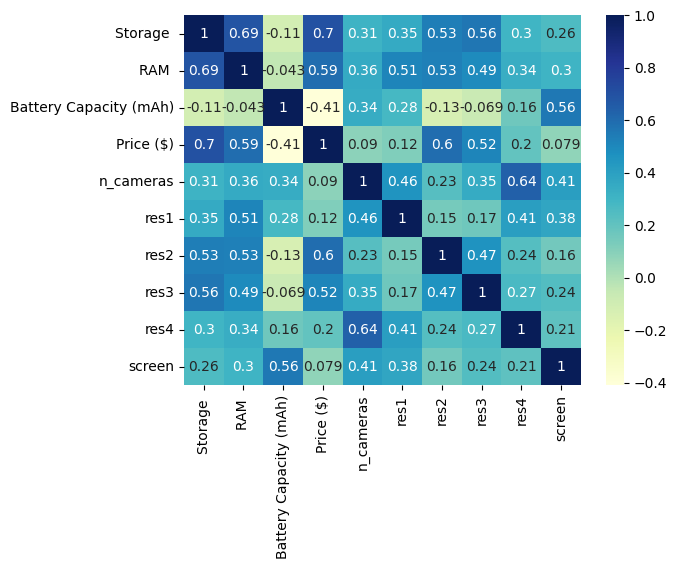

In [33]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

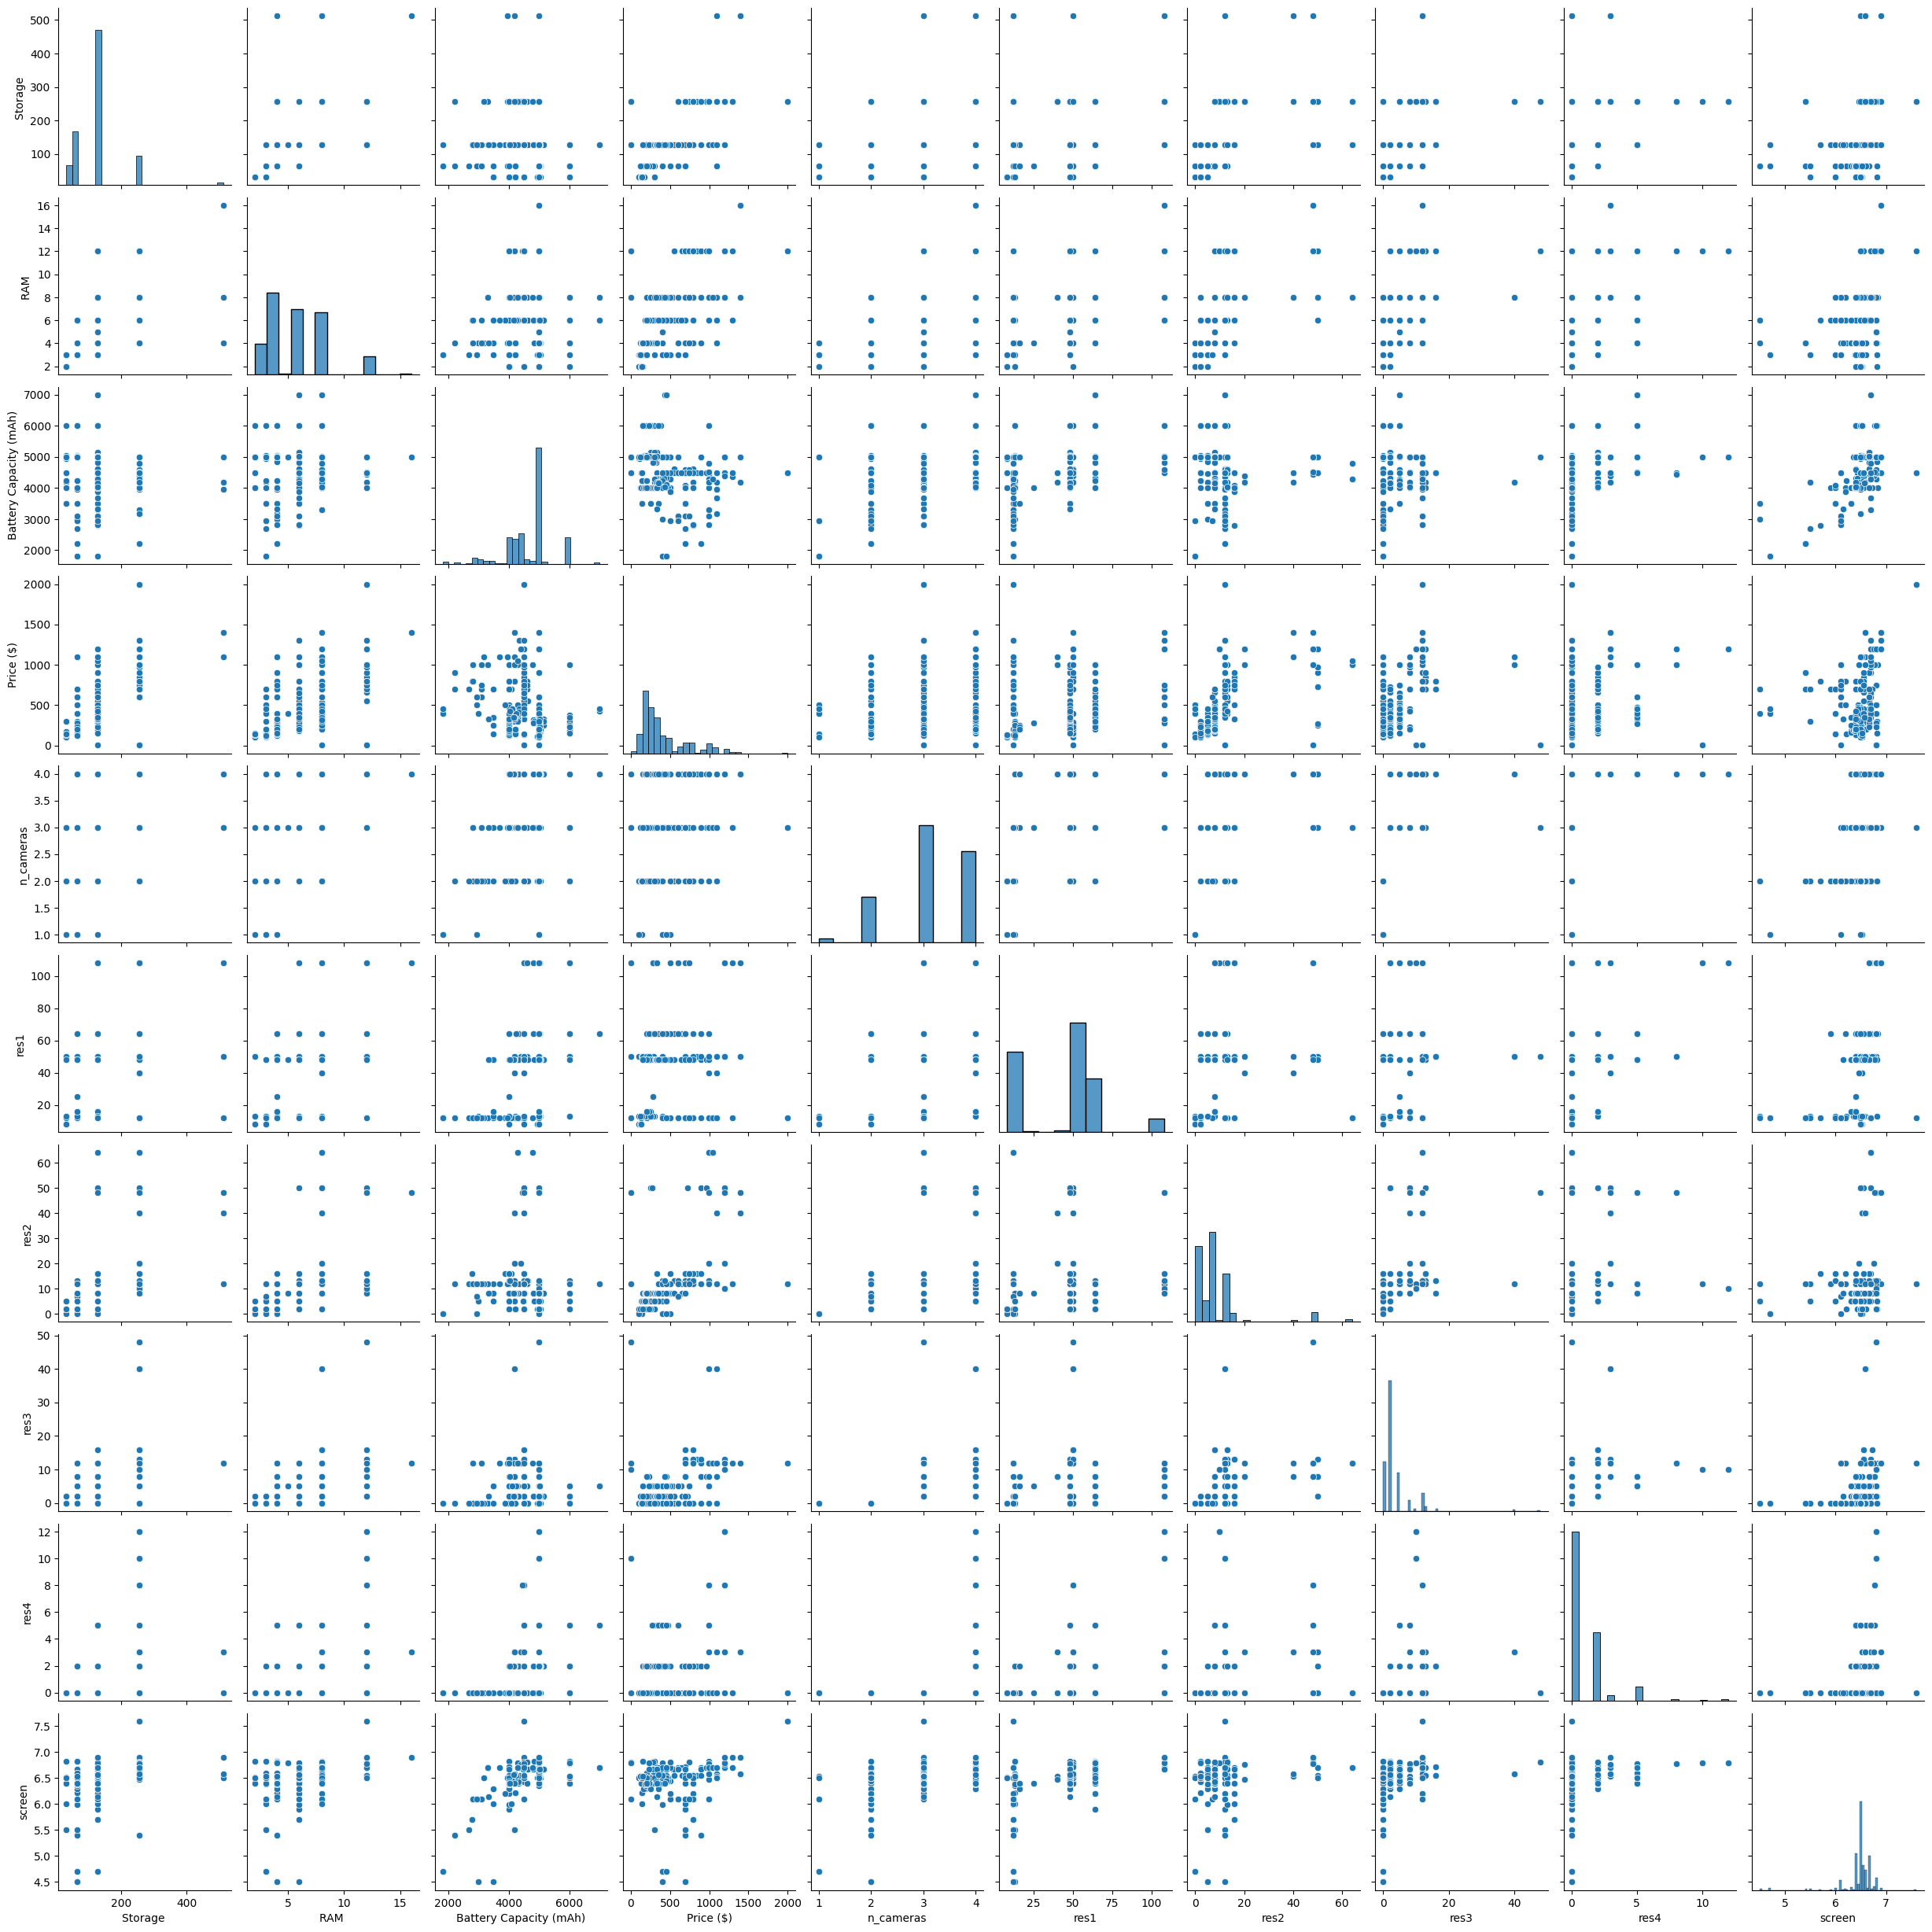

In [34]:
sns.pairplot(df)
plt.show()

# **Problem 5**

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [36]:
df['Brand']=label_encoder.fit_transform(df['Brand'])

In [37]:
df=df.drop('Brand',axis=1)

In [38]:
df=df.iloc[:,[0,1,2,4,5,6,7,8,3]]

In [39]:
df.head()

,Storage,RAM,Battery Capacity (mAh),n_cameras,res1,res2,res3,res4,Price ($)
0,128,6,3095,3,12,12,12,0,999
1,256,12,5000,4,108,10,10,12,1199
2,128,8,4500,4,48,50,8,2,899
3,128,6,5020,4,64,8,5,2,279
4,128,8,4614,2,50,12,0,0,799


df.info()

In [40]:
df.head()


,Storage,RAM,Battery Capacity (mAh),n_cameras,res1,res2,res3,res4,Price ($)
0,128,6,3095,3,12,12,12,0,999
1,256,12,5000,4,108,10,10,12,1199
2,128,8,4500,4,48,50,8,2,899
3,128,6,5020,4,64,8,5,2,279
4,128,8,4614,2,50,12,0,0,799


In [41]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [42]:
X.head()

,Storage,RAM,Battery Capacity (mAh),n_cameras,res1,res2,res3,res4
0,128,6,3095,3,12,12,12,0
1,256,12,5000,4,108,10,10,12
2,128,8,4500,4,48,50,8,2
3,128,6,5020,4,64,8,5,2
4,128,8,4614,2,50,12,0,0


In [43]:
y.head()

0     999
1    1199
2     899
3     279
4     799
Name: Price ($), dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)

from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(Xtrain,ytrain)

LinearRegression()

In [69]:
print(regression.coef_)

[133.05776305  55.39244732 -93.67940029 -20.32389117 -28.13920311
  51.21230534  13.87510532  25.04682722]


In [70]:
print(regression.intercept_)

389.93356643356645


In [71]:
print(regression.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [72]:
ypred=regression.predict(Xtest)

ypred

array([ 515.8856122 ,   50.20588151,  207.94554615,  116.22911102,
        760.34198028, 1054.91647458,  421.86152345,  351.23183386,
        291.71188696,   55.46195722,  432.79221718,  347.6095634 ,
        184.23182331,  577.84874409,  415.84596619,  326.22012188,
        -29.99056018,  159.93337257,  174.7240288 ,  828.14804278,
         74.48085517,  493.34361113,   91.25201122,  347.6095634 ,
        875.01540779,  347.6095634 ,  307.03800364, 1449.5395631 ,
        479.69994139,  879.79944956,  598.49573878, 1107.95774737,
        616.24569098,  297.67008881,  218.91785902,  442.59427625,
        559.15920119,  604.60073531,  429.4519547 ,  469.37732112,
        368.51329097,  396.38388874,  154.8778833 ,  280.77178019,
        509.48179956,  170.95888423,  176.91708609,  642.03328176,
        509.48179956,  375.03223758,  838.26816147,  417.03125096,
        275.63088602,  451.64855231,  341.86391903,  307.03800364,
        330.27355193,  169.5162312 ,  473.20874394,  391.80339

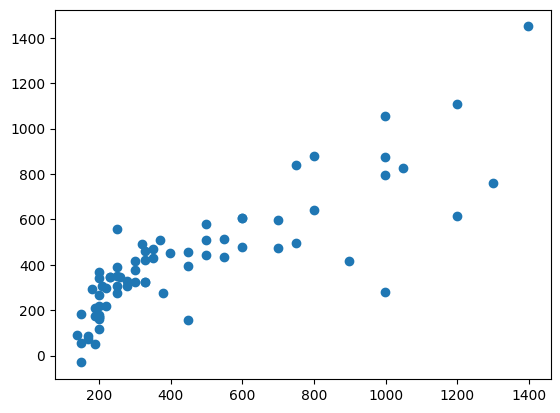

In [73]:
plt.scatter(ytest,ypred)
plt.show()

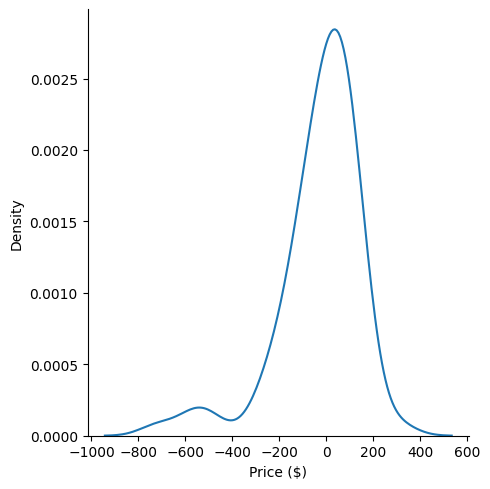

In [74]:
residual=ypred-ytest

sns.displot(residual,kind='kde')
plt.show()

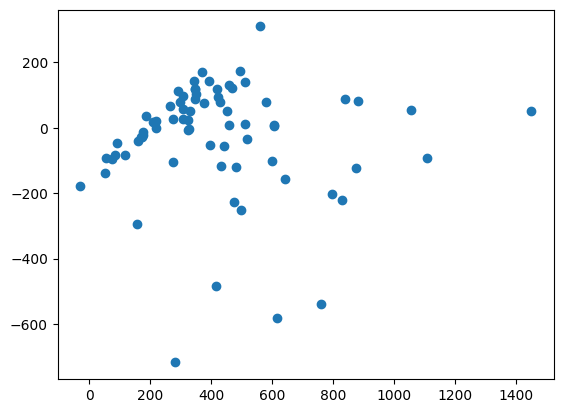

In [75]:
plt.scatter(ypred,residual)
plt.show()

In [76]:
lr = LinearRegression()

In [77]:
lr.fit(Xtrain, ytrain)

LinearRegression()

# Problem 6

In [78]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(Xtrain, ytrain)

prediction = ridge.predict(Xtest)

ridge.score(Xtest, ytest)

0.6886920066728981

# Problem 7

In [79]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(Xtrain, ytrain)

prediction = dt.predict(Xtest)

dt.score(Xtest, ytest)

0.4424054710065547

In [80]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor



In [81]:
re=np.array(df.iloc[0,:-1])
re.reshape(1,-1)

array([[ 128,    6, 3095,    3,   12,   12,   12,    0]])

In [82]:
scaler.transform(re.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.05993511,  0.06137164, -2.05403937, -0.19644192, -1.22899097,
         0.33665381,  1.6576836 , -0.5525509 ]])

In [83]:
regression.predict(scaler.transform(re.reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([658.70609555])

In [84]:
training=regression.score(Xtrain,ytrain)
test=regression.score(Xtest,ytest)
print(f"Training accuracy:{training}\n Testing accuracy:{test}")
print("our model is normal distributed")

Training accuracy:0.6772463479854447
 Testing accuracy:0.6880620911416144
our model is normal distributed


# **Problem 6**

In [85]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(Xtrain, ytrain)

Ridge()

In [86]:
prediction = ridge.predict(Xtest)

ridge.score(Xtest, ytest)

0.6886920066728981

# **Problem 7**

In [87]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [89]:
dt.fit(Xtrain, ytrain)


DecisionTreeRegressor()

In [90]:
prediction = dt.predict(Xtest)

dt.score(Xtest, ytest)

0.5145276540131781

# Problem 8

In [91]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(Xtrain,
         ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[17:45:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:45:02] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             verbose=True)

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
predictions = xgb_grid.predict(Xtest)

mae, mse, r_squared = evaluation(ytest, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r_squared)

from keras.models import Model
new_row = {"Model": "XgBoost","MAE": mae, "MSE": mse, "R2 Score": r_squared}
# models = models.append(new_row, ignore_index=True)

MAE: 80.77839438120525
MSE: 19075.36571395388
R2 Score: 0.8107828199427356


# **Problem 9**

In [109]:
def evaluation (y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r_squared = r2_score(y, predictions)
    return mae, mse, r_squared

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

models = pd.DataFrame(columns=["Model","MAE","MSE","R2 Score","RMSE (Cross-Validation)"])
models

,Model,MAE,MSE,R2 Score,RMSE (Cross-Validation)


In [112]:
mae,mse,r_squared = evaluation(ytest, prediction)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r_squared)


new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "R2 Score": r_squared}


MAE: 114.44907407407406
MSE: 48941.446759259255
R2 Score: 0.5145276540131781


#Another Problem

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [128]:
data = pd.read_csv('/content/drive/MyDrive/lab_performence/Salary_Data.csv')

In [129]:
print(data.head()) 
print(data.describe()) 

   YearsExperience   Age  Salary
0              1.1  21.0   39343
1              1.3  21.5   46205
2              1.5  21.7   37731
3              2.0  22.0   43525
4              2.2  22.2   39891
       YearsExperience        Age         Salary
count        30.000000  30.000000      30.000000
mean          5.313333  27.216667   76003.000000
std           2.837888   5.161267   27414.429785
min           1.100000  21.000000   37731.000000
25%           3.200000  23.300000   56720.750000
50%           4.700000  25.000000   65237.000000
75%           7.700000  30.750000  100544.750000
max          10.500000  38.000000  122391.000000


In [130]:
X = data[['YearsExperience', 'Age']]
y = data['Salary'].values.reshape(-1, 1)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [134]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [135]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 13242041.685624378


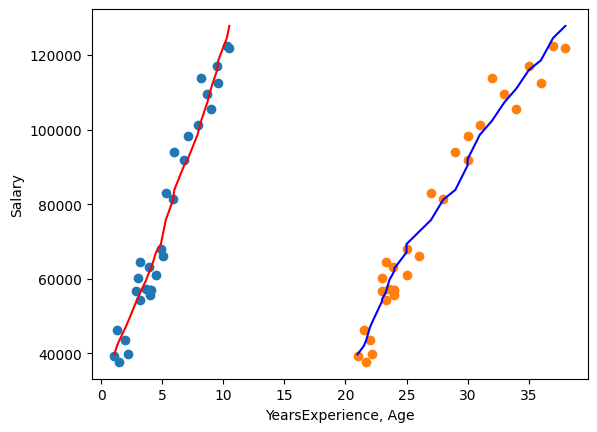

In [136]:
plt.scatter(data['YearsExperience'], y)
plt.scatter(data['Age'], y)
plt.plot(data['YearsExperience'], model.predict(X), color='red')
plt.plot(data['Age'], model.predict(X), color='blue')
plt.xlabel('YearsExperience, Age')
plt.ylabel('Salary')
plt.show()

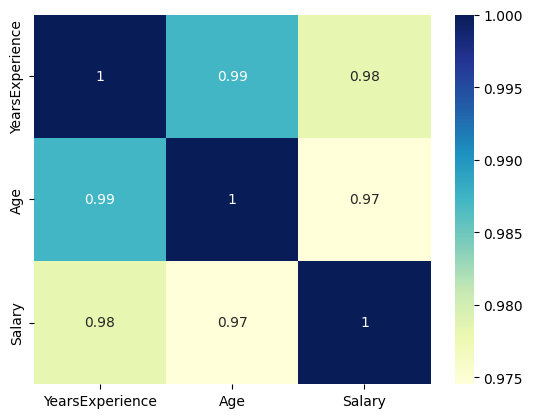

In [137]:
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

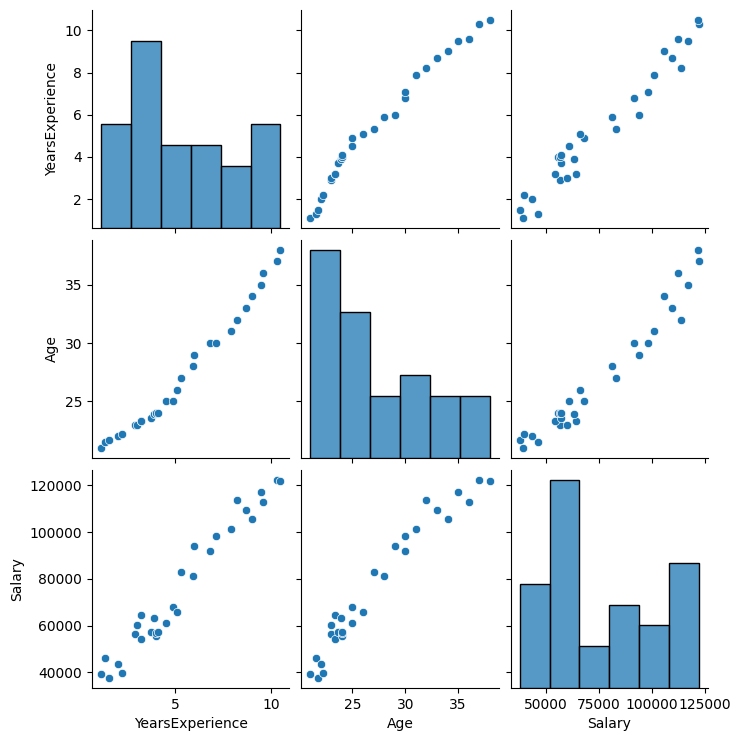

In [138]:
sns.pairplot(data)

In [140]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [141]:
prediction = ridge.predict(X_test)

ridge.score(X_test, y_test)

0.9868100422171315

In [142]:
from sklearn.tree import DecisionTreeRegressor

In [143]:
dt = DecisionTreeRegressor()

In [144]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [145]:
prediction = dt.predict(X_test)

dt.score(X_test, y_test)

0.9758021972604013

In [146]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[20:23:41] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:23:41] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             verbose=True)

In [148]:
predictions = xgb_grid.predict(X_test)

mae, mse, r_squared = evaluation(y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r_squared)


new_row = {"Model": "XgBoost","MAE": mae, "MSE": mse, "R2 Score": r_squared}


MAE: 4877.439453125
MSE: 31523783.642926533
R2 Score: 0.9709171304894749


In [149]:
def evaluation (y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    r_squared = r2_score(y, predictions)
    return mae, mse, r_squared

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

models = pd.DataFrame(columns=["Model","MAE","MSE","R2 Score","RMSE (Cross-Validation)"])
models

,Model,MAE,MSE,R2 Score,RMSE (Cross-Validation)


In [151]:
mae,mse,r_squared = evaluation(y_test, prediction)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r_squared)


new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "R2 Score": r_squared}


MAE: 4209.333333333333
MSE: 26228715.083333332
R2 Score: 0.9758021972604013
